# __Impact Analysis of Monkeypox Case Study__

___

## **Data Import**

### Import Library

In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data (Import File)

In [2]:
# Change the working directory to the project root
print("Before")
print(f"Current working directory: {os.getcwd()}")
os.chdir('..')  # Exit folder notebooks/visualization/
print(f"Current working directory: {os.getcwd()}")
os.chdir('..')  # Exit folder notebooks/
print(f"Current working directory: {os.getcwd()}")
print("After")
print(f"Current working directory: {os.getcwd()}")

Before
Current working directory: d:\Project\DataAnalyst-ImpactAnalysisOfMonkeypoxCaseStudy\notebooks\visualization
Current working directory: d:\Project\DataAnalyst-ImpactAnalysisOfMonkeypoxCaseStudy\notebooks
Current working directory: d:\Project\DataAnalyst-ImpactAnalysisOfMonkeypoxCaseStudy
After
Current working directory: d:\Project\DataAnalyst-ImpactAnalysisOfMonkeypoxCaseStudy


In [3]:
# Load the dataset
while True:
    try:
        start_year = int(input("Enter the start year (example: 2022): "))
        start_month = int(input("Enter the start month (1-12): "))

        end_year = int(input("Enter the end year (example: 2024): "))
        end_month = int(input("Enter the end month (1-12): "))

        # Input Validation
        if start_month < 1 or start_month > 12 or end_month < 1 or end_month > 12:
            print("Month must be between 1 and 12. Please try again.")
        elif start_year > end_year or (start_year == end_year and start_month > end_month):
            print("The start date cannot be later than the end date. Please try again.")
        else:
            break
    except ValueError:
        print("Invalid input. Please enter valid year and month numbers (example: 2022 and 5 for May).")

# Format the file name according to the selected year and month range
file_name = f"monkeypox_{start_year}_{start_month}_to_{end_year}_{end_month}_processed.csv"

# Build file paths relative to the project root
root_dir = Path(os.getcwd())  # Project root (Monkey Pox Impact Analysis/Monkey Pox Case Study/)
data_dir = root_dir / "data" / "processed"  # Directory data/processed
data_file = data_dir / file_name  # Full path to the file

# Debugging: Print the constructed file path
print(f"Constructed file path: {data_file}")

# Check if the file exists
if os.path.exists(data_file):
    df = pd.read_csv(data_file)
    print(f"Data successfully loaded from {data_file}")
else:
    print(f"File {data_file} not found.")

Constructed file path: d:\Project\DataAnalyst-ImpactAnalysisOfMonkeypoxCaseStudy\data\processed\monkeypox_2022_5_to_2024_12_processed.csv
Data successfully loaded from d:\Project\DataAnalyst-ImpactAnalysisOfMonkeypoxCaseStudy\data\processed\monkeypox_2022_5_to_2024_12_processed.csv


C:\Users\Ryan\AppData\Local\Temp\ipykernel_56412\2627780150.py:33: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


In [4]:
# showing the entire of dataset
print("\nProcessed data preview:")
df.head()


Processed data preview:


,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.0,0.001,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
1,Africa,2022-05-02,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
2,Africa,2022-05-03,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
3,Africa,2022-05-04,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN
4,Africa,2022-05-05,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN


In [5]:
# Checking data type and column of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107021 entries, 0 to 107020
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   location                         107021 non-null  object 
 1   date                             107021 non-null  object 
 2   iso_code                         106045 non-null  object 
 3   total_cases                      107021 non-null  float64
 4   total_deaths                     107021 non-null  float64
 5   new_cases                        107021 non-null  float64
 6   new_deaths                       107021 non-null  float64
 7   new_cases_smoothed               107021 non-null  float64
 8   new_deaths_smoothed              107021 non-null  float64
 9   new_cases_per_million            107021 non-null  float64
 10  total_cases_per_million          107021 non-null  float64
 11  new_cases_smoothed_per_million   107021 non-null  float64
 12  ne

## **Exploratory Data Analysis (EDA)**

In [6]:
# Classification of Countries and Regions/Continents
# List of regions/continents that are not countries
regions_or_continents = ['World', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']  # You can add it if needed

# Added a new column 'location_type' to classify between 'Country' and 'Region/Continent'
df['location_type'] = df['location'].apply(lambda x: 'Region/Continent' if x in regions_or_continents else 'Country')

# Checking if the clustering was successful
print("\nLocation types (Countries vs Regions/Continents):")
print(df['location_type'].value_counts())


Location types (Countries vs Regions/Continents):
location_type
Country             100223
Region/Continent      6798
Name: count, dtype: int64


In [7]:
# Grouping country and non-country data for separate analysis
countries_data = df[df['location_type'] == 'Country']
regions_data = df[df['location_type'] == 'Region/Continent']

# Optional: Displays the number of countries and regions identified
print(f"\nNumber of Countries: {countries_data['location'].nunique()}")
print(f"Number of Regions/Continents: {regions_data['location'].nunique()}")


Number of Countries: 128
Number of Regions/Continents: 7


In [8]:
# View the dataset after being classified between countries and non-countries
print("\nClassified dataset:")
df.head()


Classified dataset:


,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation,location_type
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.0,0.001,0.03,0.0,0.0,0.00141,0.0,NaN,NaN,Region/Continent
1,Africa,2022-05-02,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN,Region/Continent
2,Africa,2022-05-03,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN,Region/Continent
3,Africa,2022-05-04,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN,Region/Continent
4,Africa,2022-05-05,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.03,0.0,0.0,0.00141,0.0,NaN,NaN,Region/Continent


**Epidemiologic Trends: Investigating the Spread of Monkeypox**

Looking at trends in the spread of Monkeypox with a focus on the factors of new cases, total cases, and mortality rates.

In [22]:
# EDA: Mengonversi kolom 'date' menjadi format tahun dan menghitung jumlah per tahun
df.loc['year'] = pd.to_datetime(df['date']).dt.year

# Menghitung jumlah (SUM) new_cases dan total_cases per tahun
data_cases_yearly_sum = df.groupby('year').agg({
    'new_cases': 'sum',
    'total_cases': 'sum'
}).reset_index()

# Menghitung jumlah (SUM) new_cases dan total_cases per tahun
data_deaths_yearly_sum = df.groupby('year').agg({
    'new_deaths': 'sum',
    'total_deaths': 'sum'
}).reset_index()

# # EDA: Mengonversi kolom 'date' menjadi format tahun dan menghitung jumlah per tahun
# df.loc[:, 'year'] = pd.to_datetime(df['date']).dt.year

# # Menghitung jumlah (SUM) new_cases dan total_cases per tahun
# data_cases_yearly_sum = df.groupby('year').agg({
#     'new_cases': 'sum',
#     'total_cases': 'sum'
# }).reset_index()

# # Menghitung jumlah (SUM) new_cases dan total_cases per tahun
# data_deaths_yearly_sum = df.groupby('year').agg({
#     'new_deaths': 'sum',
#     'total_deaths': 'sum'
# }).reset_index()

**Regional Comparisons: Country/Region Comparisons**

Comparing countries to understand how Monkeypox affects different regions.


In [10]:
# View total cases and deaths in each country
data_grouped_by_location_countries = countries_data.groupby('location').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()

# View total cases and deaths in each region/continent
data_grouped_by_location_regions = regions_data.groupby('location').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()

**Demographic Trends: Impact by Country**

Analyze the impact of Monkeypox by Countries.

In [11]:
# A look at the countries with the highest total cases
top_countries = data_grouped_by_location_countries.nlargest(10, 'total_cases')

**Temporal Analysis: Time of Deployment Analysis**

Analyzing how the spread of Monkeypox changes over time.


In [13]:
# Make sure the 'date' field is in datetime format
countries_data['date'] = pd.to_datetime(countries_data['date'], errors='coerce')

# Create a 'month' column in Year-Month format
countries_data['month'] = countries_data['date'].dt.strftime('%Y-%m')

# Convert the 'new_cases' and 'new_deaths' columns to numeric
countries_data['new_cases'] = pd.to_numeric(countries_data['new_cases'], errors='coerce')
countries_data['new_deaths'] = pd.to_numeric(countries_data['new_deaths'], errors='coerce')

# Group data by 'month' and calculate total new cases and deaths by month
cases_per_month = countries_data.groupby('month').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum'
}).reset_index()

# # Make sure the 'date' field is in datetime format
# df.loc[:, 'date'] = pd.to_datetime(df['date'], errors='coerce')

# # Create a 'month' column in Year-Month format
# df.loc[:, 'month'] = df['date'].dt.strftime('%Y-%m')

# # Convert the 'new_cases' and 'new_deaths' columns to numeric
# df.loc[:, 'new_cases'] = pd.to_numeric(df['new_cases'], errors='coerce')
# df.loc[:, 'new_deaths'] = pd.to_numeric(df['new_deaths'], errors='coerce')

# # Group data by 'month' and calculate total new cases and deaths by month
# cases_per_month = df.groupby('month').agg({
#     'new_cases': 'sum',
#     'new_deaths': 'sum'
# }).reset_index()


C:\Users\Ryan\AppData\Local\Temp\ipykernel_56412\4193857224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_data['date'] = pd.to_datetime(countries_data['date'], errors='coerce')
C:\Users\Ryan\AppData\Local\Temp\ipykernel_56412\4193857224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_data['month'] = countries_data['date'].dt.strftime('%Y-%m')
C:\Users\Ryan\AppData\Local\Temp\ipykernel_56412\4193857224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

**Identification of High-risk Regions: Top Locations by Case Fatality Ratio**

Identify high-risk areas based on case prevalence ratios.


In [14]:
# Calculating CFR
data_grouped_by_location_countries['CFR'] = data_grouped_by_location_countries['total_deaths'] / data_grouped_by_location_countries['total_cases'] * 100  # dalam persen

# Identify areas with high CFR
high_cfr_locations = data_grouped_by_location_countries.nlargest(10, 'CFR')

## **Data Visualization**

**Epidemiologic Trends: Investigating the Spread of Monkeypox**

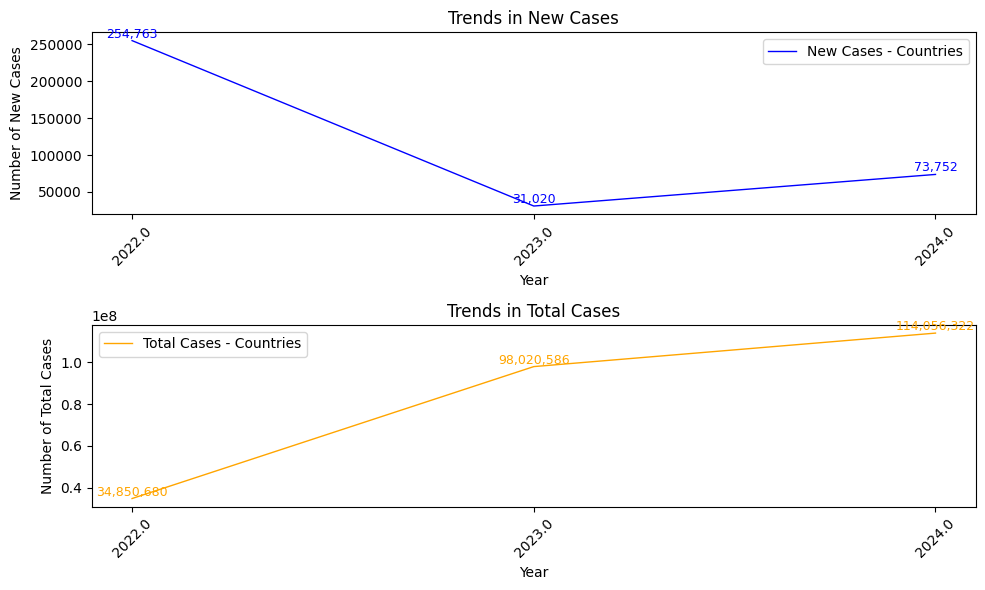

In [23]:
# Visualize the trend of new cases and total cases over time
# Create two subplots (one for new_cases and one for total_cases)
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# new_cases trend visualization
sns.lineplot(x='year', y='new_cases', data=data_cases_yearly_sum, label='New Cases - Countries', color='blue', ax=axes[0], linewidth=1)
axes[0].set_title('Trends in New Cases')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of New Cases')

# Adding labels to data points for new_cases (yearly totals)
for year in sorted(data_cases_yearly_sum['year']):
    new_cases_value = data_cases_yearly_sum[data_cases_yearly_sum['year'] == year]['new_cases'].sum()  # Total per tahun
    axes[0].text(year, new_cases_value, f'{new_cases_value:,.0f}', color='blue', ha='center', va='bottom', fontsize=9)

# Visualisasi tren total_cases
sns.lineplot(x='year', y='total_cases', data=data_cases_yearly_sum, label='Total Cases - Countries', color='orange', ax=axes[1], linewidth=1)
axes[1].set_title('Trends in Total Cases')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Total Cases')

# Add a label to the data point for total_cases (grand total for each year)
for year in sorted(data_cases_yearly_sum['year']):
    total_cases_value = data_cases_yearly_sum[data_cases_yearly_sum['year'] == year]['total_cases'].sum()  # Total per tahun
    axes[1].text(year, total_cases_value, f'{total_cases_value:,.0f}', color='orange', ha='center', va='bottom', fontsize=9)

# Added X-axis rotation
for ax in axes:
    ax.set_xticks(sorted(data_cases_yearly_sum['year'].unique()))
    ax.set_xticklabels(sorted(data_cases_yearly_sum['year'].unique()), rotation=45)

# Tighter layout settings
plt.tight_layout()

# Show graph
plt.show()

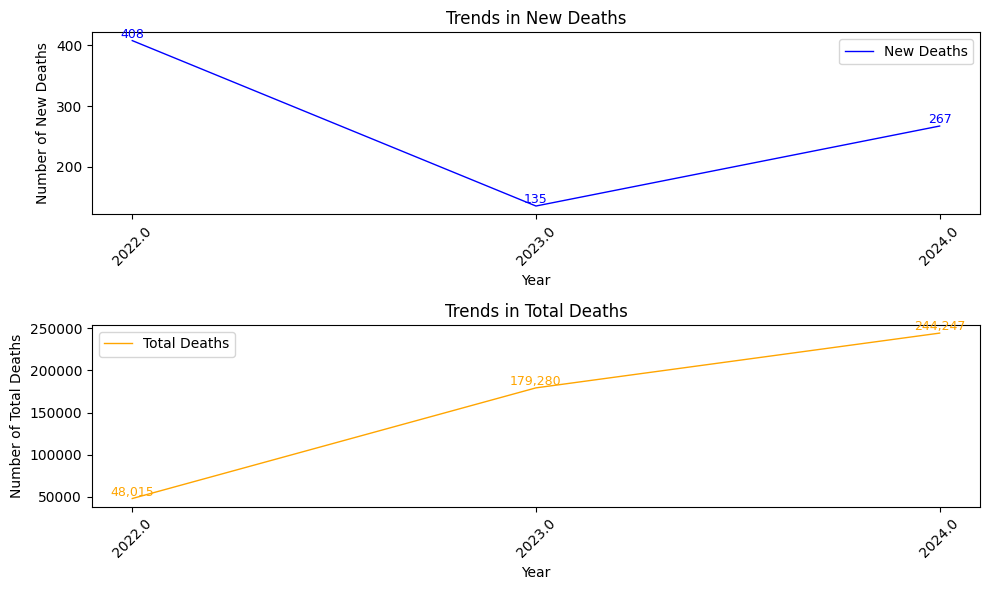

In [24]:
# Visualize the trend of new deaths and total deaths over time
# Create two subplots (one for new_deaths and one for total_deaths)
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Visualisasi tren new_cases
sns.lineplot(x='year', y='new_deaths', data=data_deaths_yearly_sum, label='New Deaths', color='blue', ax=axes[0], linewidth=1)
axes[0].set_title('Trends in New Deaths')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of New Deaths')

# Adding labels to data points for new_deaths (yearly totals)
for year in sorted(data_deaths_yearly_sum['year']):
    new_deaths_value = data_deaths_yearly_sum[data_deaths_yearly_sum['year'] == year]['new_deaths'].sum()  # Total per tahun
    axes[0].text(year, new_deaths_value, f'{new_deaths_value:,.0f}', color='blue', ha='center', va='bottom', fontsize=9)

# total_deaths trend visualization
sns.lineplot(x='year', y='total_deaths', data=data_deaths_yearly_sum, label='Total Deaths', color='orange', ax=axes[1], linewidth=1)
axes[1].set_title('Trends in Total Deaths')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Total Deaths')

# Adding labels to data points for total_deaths (grand total for each year)
for year in sorted(data_deaths_yearly_sum['year']):
    total_deaths_value = data_deaths_yearly_sum[data_deaths_yearly_sum['year'] == year]['total_deaths'].sum()  # Total per tahun
    axes[1].text(year, total_deaths_value, f'{total_deaths_value:,.0f}', color='orange', ha='center', va='bottom', fontsize=9)

# Added X-axis rotation
for ax in axes:
    ax.set_xticks(sorted(data_deaths_yearly_sum['year'].unique()))
    ax.set_xticklabels(sorted(data_deaths_yearly_sum['year'].unique()), rotation=45)

# Tighter layout settings
plt.tight_layout()

# Show graph
plt.show()

**Regional Comparisons: Country/Region Comparisons**

In [17]:
# Sort data by total_cases in descending order
data_sorted = data_grouped_by_location_countries.sort_values('total_cases', ascending=False)

# Sort data by total_cases in descending order
data_sorted['total_deaths'] = data_grouped_by_location_countries['total_deaths']

# Display tables that already have 'total_cases' and 'total_deaths' columns
pd.set_option('display.max_rows', None)  # Optional, if you want to display all rows
data_sorted[['location', 'total_cases', 'total_deaths']]

,location,total_cases,total_deaths
122,United States,27657149.0,49637.0
14,Brazil,9920826.0,12686.0
110,Spain,6867325.0,2544.0
40,France,3686287.0,0.0
23,Colombia,3489732.0,0.0
121,United Kingdom,3451977.0,0.0
43,Germany,3381373.0,0.0
77,Mexico,3364454.0,25830.0
93,Peru,3261595.0,18650.0
32,Democratic Republic of Congo,1835362.0,8437.0


In [18]:
# Sort data by total_cases in descending order
data_sorted_by_region_cases = data_grouped_by_location_regions.sort_values('total_cases', ascending=False)

# Add the total_deaths column to data_sorted_by_region_cases
data_sorted_by_region_cases['total_deaths'] = data_grouped_by_location_regions['total_deaths']

# Display a table containing location, total_cases, and total_deaths columns by region
pd.set_option('display.max_rows', None)  # Optional, if you want to display all rows
data_sorted_by_region_cases[['location', 'total_cases', 'total_deaths']]


,location,total_cases,total_deaths
6,World,82357283.0,157426.0
3,North America,33347769.0,79239.0
2,Europe,23342033.0,6138.0
5,South America,19634205.0,37035.0
0,Africa,3089100.0,27662.0
1,Asia,2629510.0,7352.0
4,Oceania,314666.0,0.0


**Demographic Trends: Impact by Country**

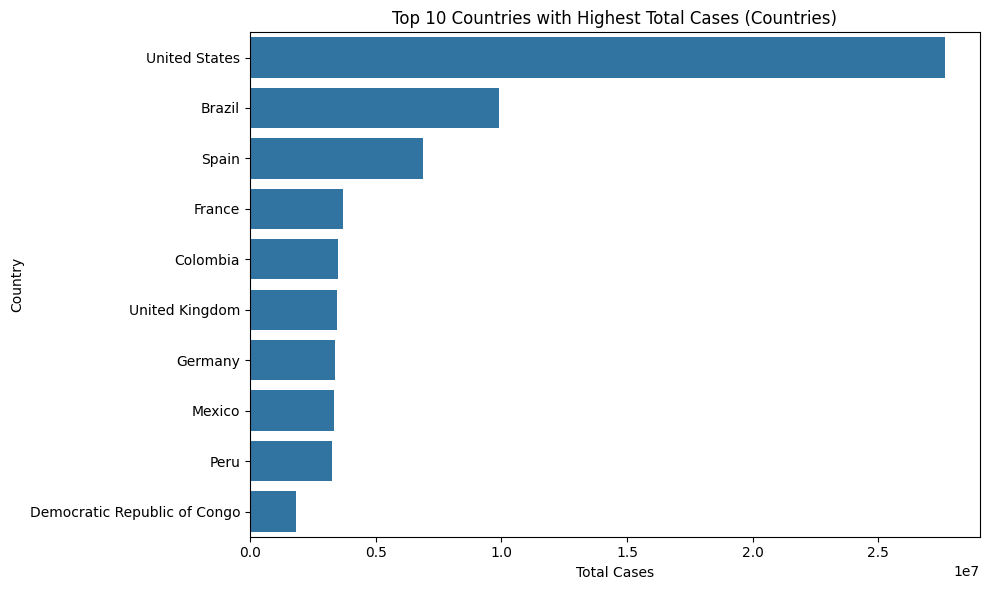

In [19]:
# Visualization: Countries with the Highest Total Cases
plt.figure(figsize=(10, 6))
sns.barplot(x='total_cases', y='location', data=top_countries)
plt.title('Top 10 Countries with Highest Total Cases (Countries)')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Temporal Analysis: Time of Deployment Analysis**

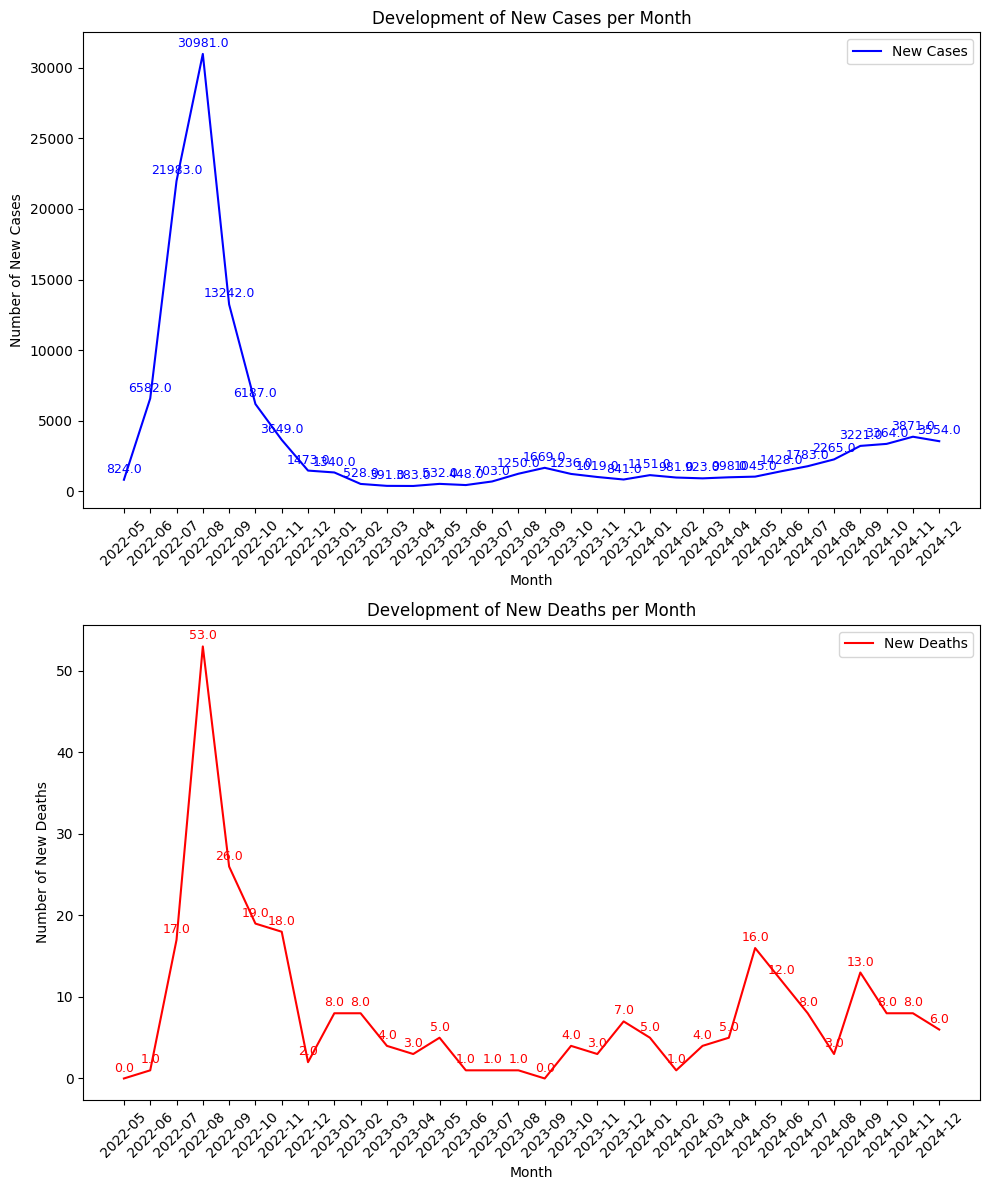

In [21]:
# Visualization: New Case Development by Month
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# First plot: New Cases
sns.lineplot(x='month', y='new_cases', data=cases_per_month, label='New Cases', ax=axes[0], color='blue')
axes[0].set_title('Development of New Cases per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of New Cases')
axes[0].tick_params(axis='x', rotation=45)

# Annotate each data point for New Cases
for i in range(len(cases_per_month)):
    axes[0].annotate(
        cases_per_month['new_cases'].iloc[i], 
        (cases_per_month['month'].iloc[i], cases_per_month['new_cases'].iloc[i]), 
        textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='blue'
    )

# Second plot: New Deaths
sns.lineplot(x='month', y='new_deaths', data=cases_per_month, label='New Deaths', ax=axes[1], color='red')
axes[1].set_title('Development of New Deaths per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of New Deaths')
axes[1].tick_params(axis='x', rotation=45)

# Annotate each data point for New Deaths
for i in range(len(cases_per_month)):
    axes[1].annotate(
        cases_per_month['new_deaths'].iloc[i], 
        (cases_per_month['month'].iloc[i], cases_per_month['new_deaths'].iloc[i]), 
        textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='red'
    )

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Identification of High-risk Regions: Top Locations by Case Fatality Ratio**

In [ ]:
# CFR visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='CFR', y='location', data=high_cfr_locations, palette='rocket')
plt.title('Top Countries by Case Fatality Ratio (CFR)')
plt.xlabel('CFR (%)')
plt.ylabel('Location')
plt.show()